# Cockpit FOV

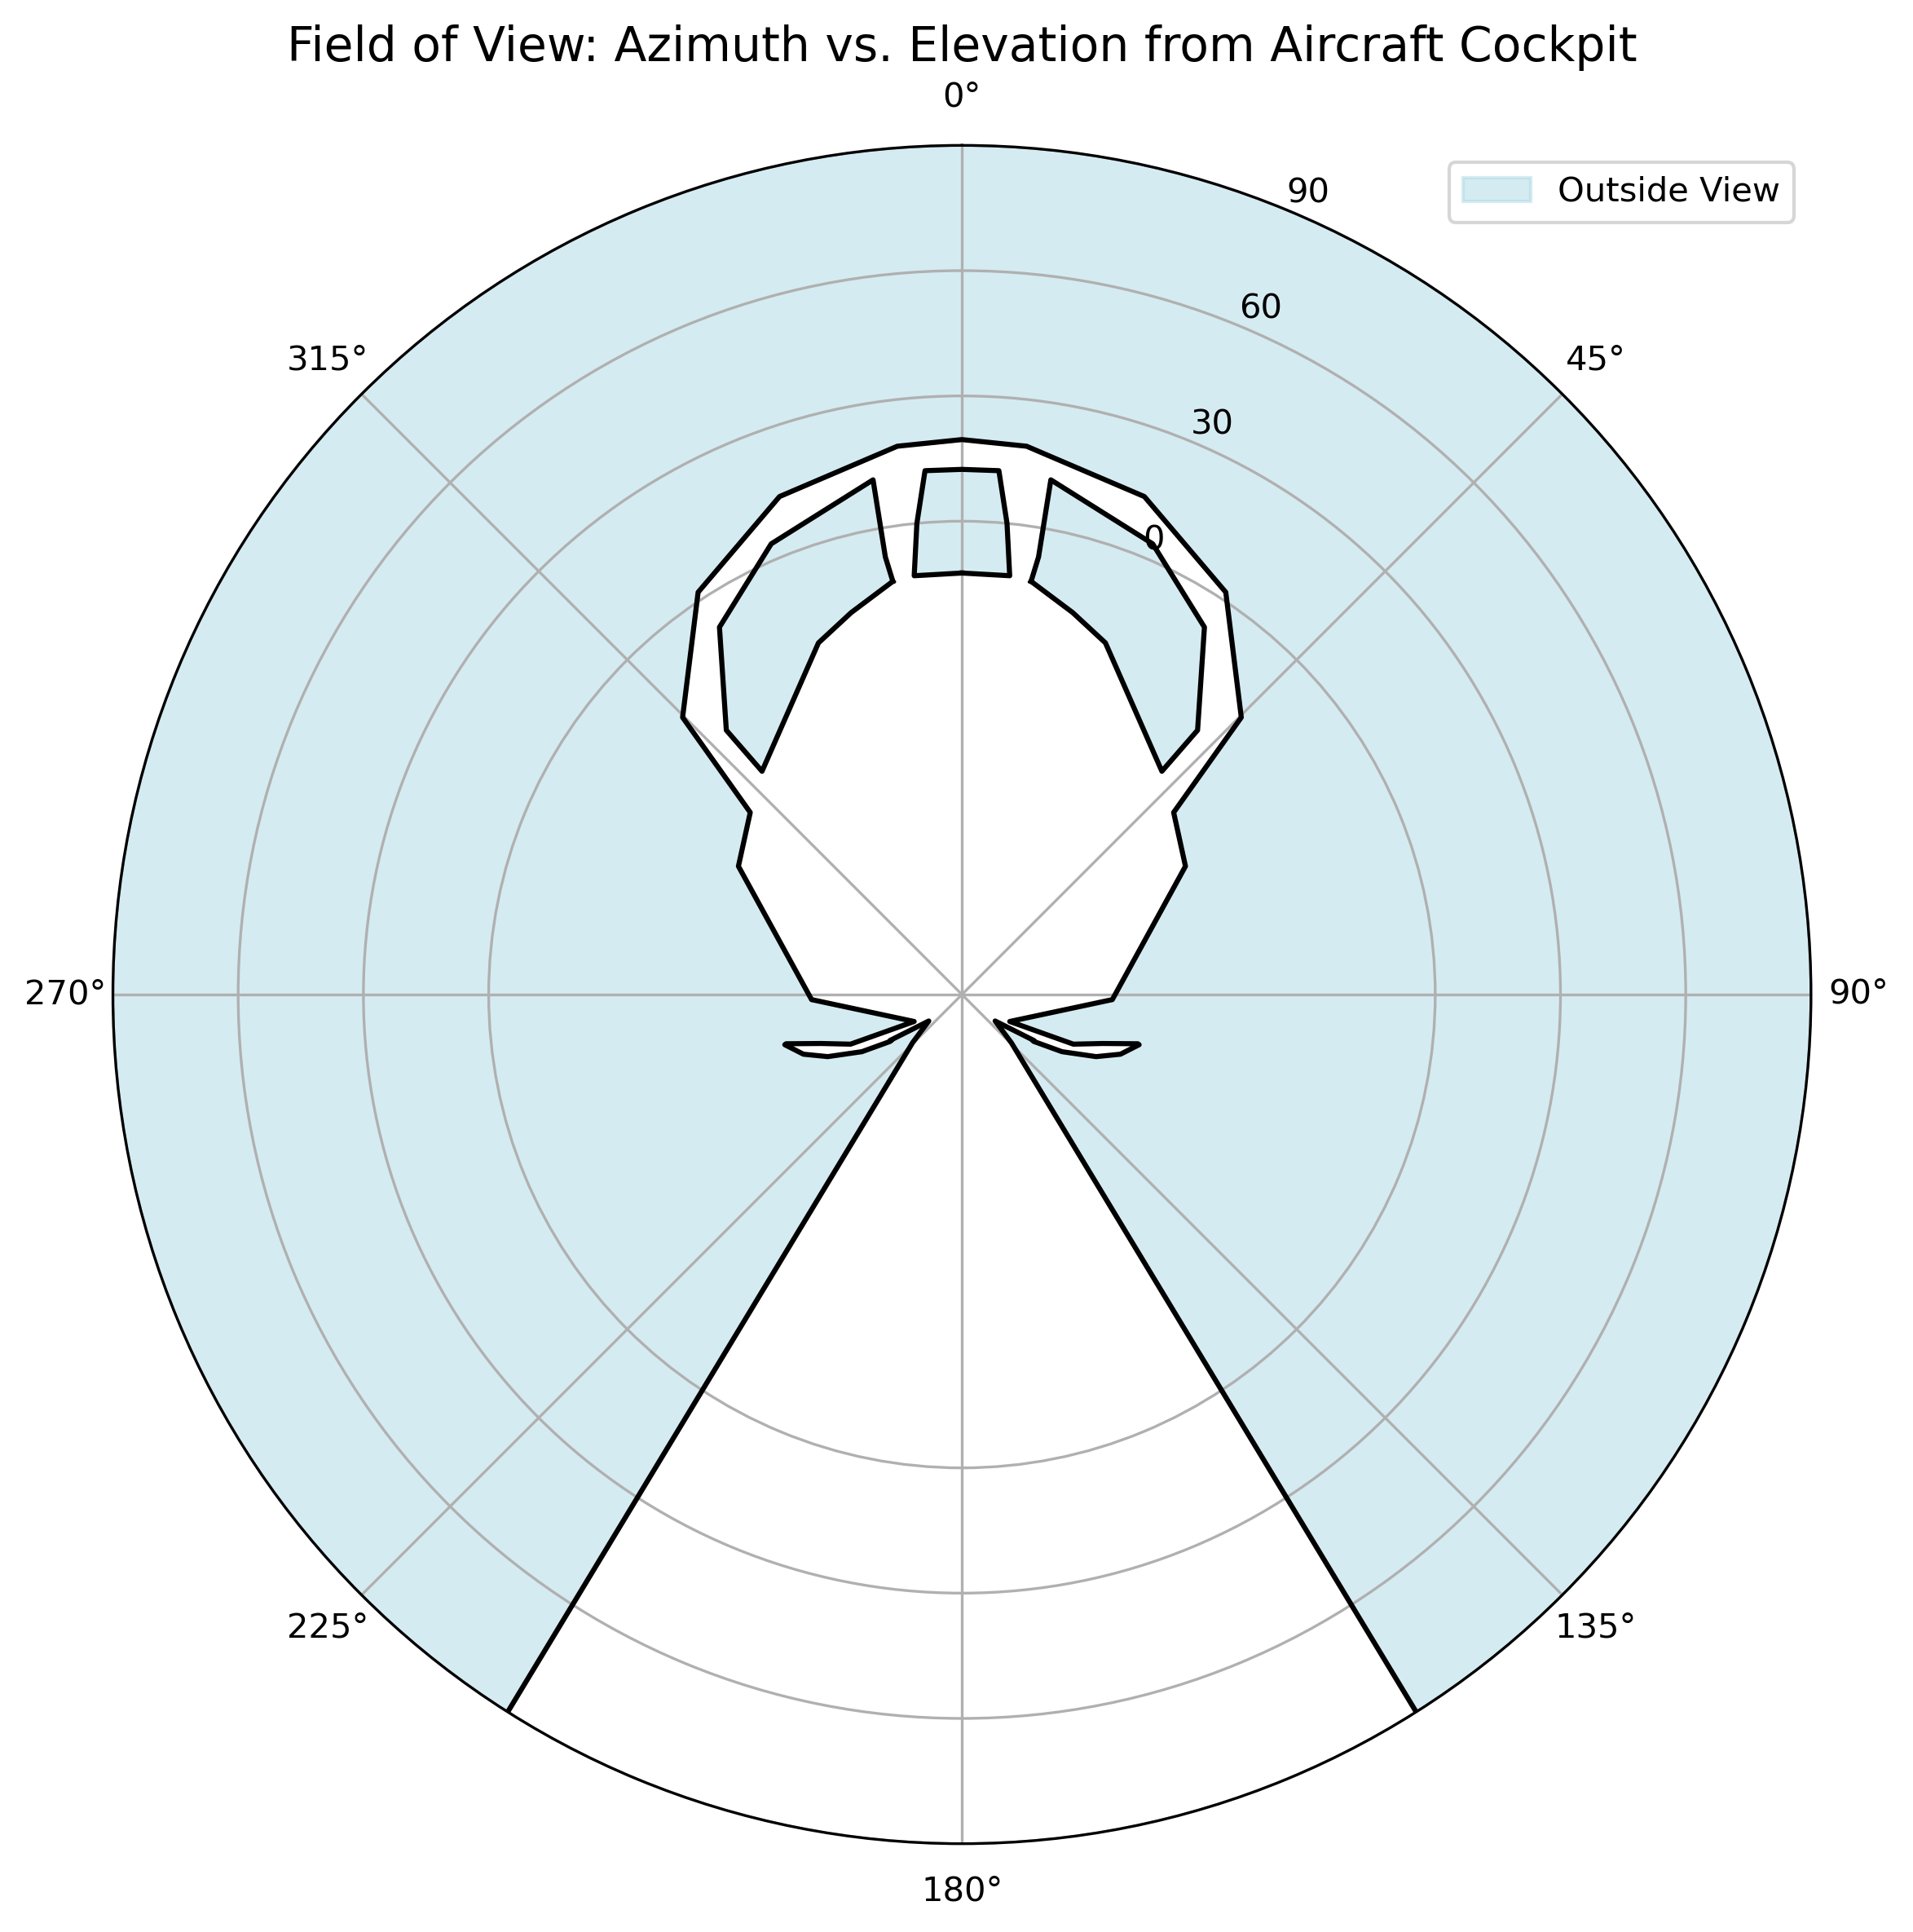

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def standardize_columns(df, column_mapping):
    # Rename columns based on the exact mapping
    df.rename(columns=column_mapping, inplace=True)
    return df


# Load data
df = pd.read_excel("./data/fov-data.xlsx")

# Standardize column names
column_mapping = {
    "Window ID": "window_id",
    "Azimuth [°]": "az",
    "Elevation [°]": "el",
}
df = standardize_columns(df, column_mapping)

# Group data by window ID
grouped = df.groupby("window_id")

# Select the Window ID to debug
selected_window_id = 1  # Replace with the desired Window ID to debug

# Create polar plot
fig = plt.figure(figsize=(8, 8), dpi=300)
ax = fig.add_subplot(111, polar=True)

# Plot and fill each window
for window_id, group in grouped:
    # Extract data for this window
    azimuth_deg = group["az"]
    azimuth_rad = np.radians(azimuth_deg)
    elevation = group["el"]

    # Ensure the area is closed by appending the first point
    azimuth_rad = np.append(azimuth_rad, azimuth_rad.iloc[0])
    elevation = np.append(elevation, elevation.iloc[0])

    # Special case: Handle the 'CANOPY' window
    if window_id == "Canopy":
        # Fill the area *outside* the canopy
        max_radius = 100  # The outer limit of the polar plot
        min_radius = 0  # The inner radius of the polar plot

        # remove last point of azimuth_rad and elevation
        azimuth_rad = azimuth_rad[:-1]
        elevation = elevation[:-1]

        ax.plot(azimuth_rad, elevation, color="black")

        # Ensure the "fill" spans from the defined elevation to the max radius
        ax.fill_between(
            azimuth_rad,
            elevation,
            max_radius,
            color="lightblue",
            alpha=0.5,
            label="Outside View",
        )
    else:
        # Plot and fill the regular window
        ax.plot(azimuth_rad, elevation, color="black")
        ax.fill(azimuth_rad, elevation, color="lightblue", alpha=0.5)

    # Annotate points if the window ID matches the selected one
    if window_id == selected_window_id:
        for az, el in zip(azimuth_rad, elevation):
            ax.annotate(
                f"({np.degrees(az):.1f}°, {el:.1f}°)",
                (az, el),
                textcoords="offset points",
                xytext=(5, 5),
                ha="center",
                fontsize=8,
                color="black",
            )

# Maximum field of view
max_azimuth = np.linspace(0, 2 * np.pi, 360)
max_elevation = np.full_like(max_azimuth, 90)
# ax.plot(max_azimuth, max_elevation, "b--", label="Maximum Field of View")

# Customize azimuth range
# ax.set_theta_zero_location('N')
# ax.set_theta_direction(-1)
# ax.set_thetamin(-60)  # Minimum azimuth in degrees
# ax.set_thetamax(60)   # Maximum azimuth in degrees
# ax.set_rmax(90)
# ax.set_rticks([0, 30, 60, 90])
# ax.set_thetagrids(range(-60, 61, 15))  # Azimuth grid lines from -60° to +60°

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rmax(90)
ax.set_rticks([0, 30, 60, 90])
ax.set_thetagrids(range(0, 360, 45))

plt.title("Field of View: Azimuth vs. Elevation from Aircraft Cockpit", fontsize=14)
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("./output/plots/field_of_view_with_wings.png")
plt.show()